[UCI Machine Learning Repository: Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
mpg = sns.load_dataset("mpg")
mpg.shape

(398, 9)

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
mpg.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### univariate

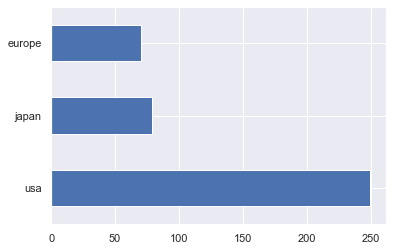

In [8]:
mpg["origin"].value_counts().plot.barh()

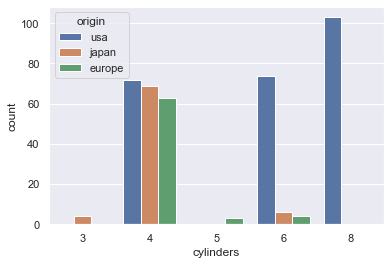

In [9]:
sns.countplot(data=mpg, x="cylinders", hue="origin")

## 서브플롯

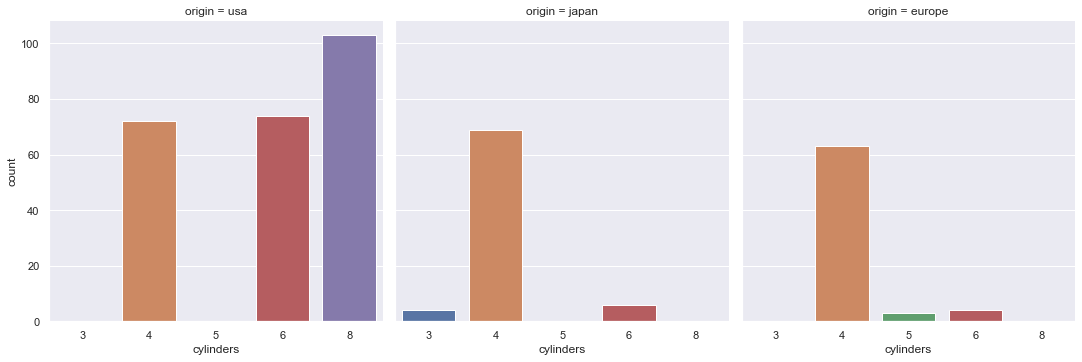

In [10]:
sns.catplot(data=mpg, x="cylinders", kind="count", col="origin")

Text(0.4, 0.5, 'axes[1, 2]')

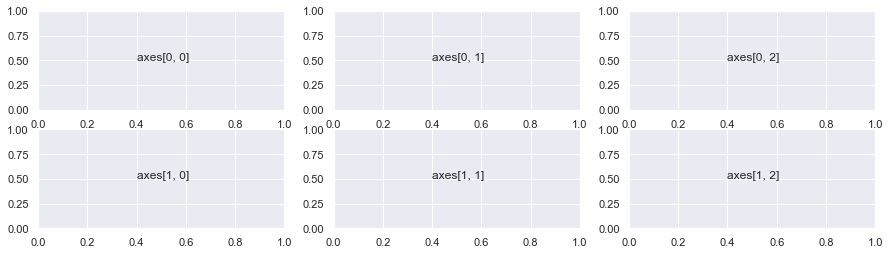

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))
axes[0, 0].text(.4, .5, "axes[0, 0]")
axes[0, 1].text(.4, .5, "axes[0, 1]")
axes[0, 2].text(.4, .5, "axes[0, 2]")
axes[1, 0].text(.4, .5, "axes[1, 0]")
axes[1, 1].text(.4, .5, "axes[1, 1]")
axes[1, 2].text(.4, .5, "axes[1, 2]")

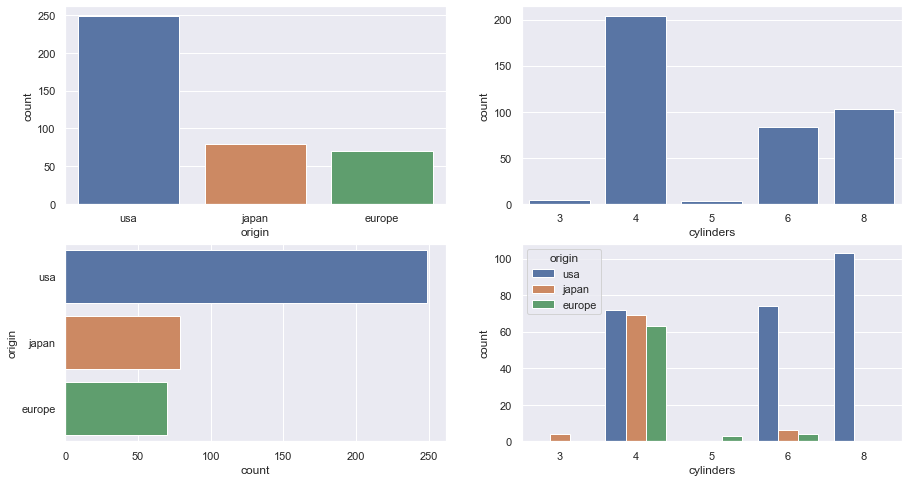

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
# plt.tight_layout()

sns.countplot(data=mpg, x="origin", ax=axes[0, 0])
sns.countplot(data=mpg, x="cylinders", color="b", ax=axes[0, 1])
sns.countplot(data=mpg, y="origin", ax=axes[1, 0])
sns.countplot(data=mpg, x="cylinders", hue="origin", ax=axes[1, 1])

## 수치형 변수

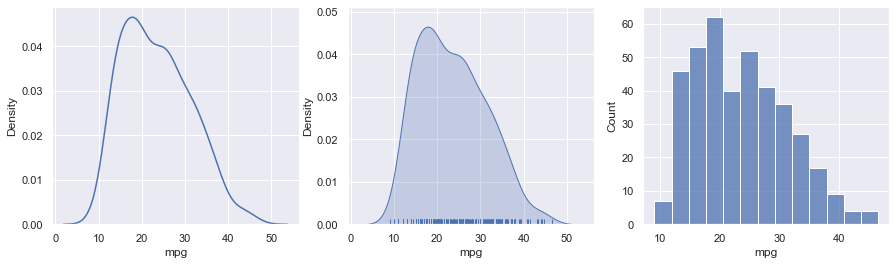

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.kdeplot(mpg["mpg"], ax=axes[0])
sns.kdeplot(mpg["mpg"], shade=True, ax=axes[1])
sns.rugplot(mpg["mpg"], ax=axes[1])
sns.histplot(mpg["mpg"], ax=axes[2])

In [14]:
print(f"Skewness: {mpg['mpg'].skew()}")
print(f"Kurtosis: {mpg['mpg'].kurt()}")

Skewness: 0.45706634399491913
Kurtosis: -0.5107812652123154


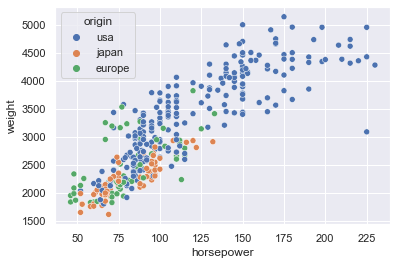

In [15]:
sns.scatterplot(data=mpg, x="horsepower", y="weight", hue="origin")

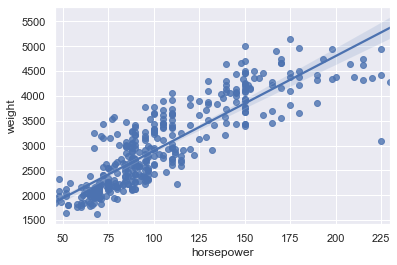

In [16]:
sns.regplot(data=mpg, x="horsepower", y="weight")

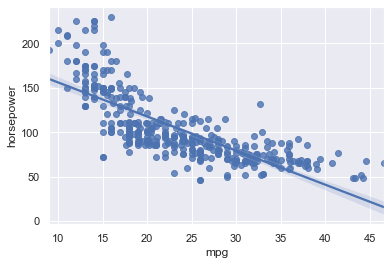

In [17]:
sns.regplot(data=mpg, x="mpg", y="horsepower")

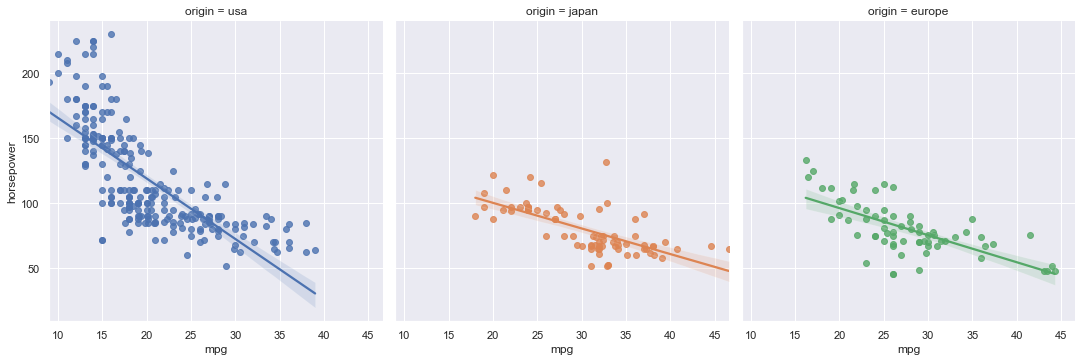

In [18]:
sns.lmplot(data=mpg, x="mpg", y="horsepower", hue="origin", col="origin")

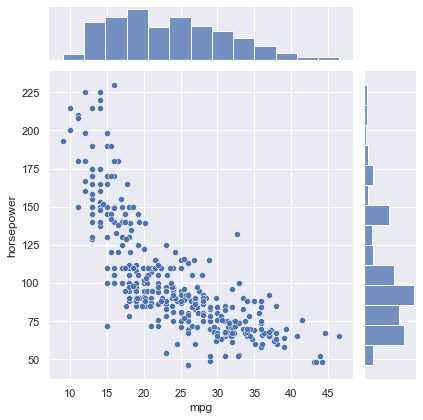

In [19]:
sns.jointplot(data=mpg, x="mpg", y="horsepower")

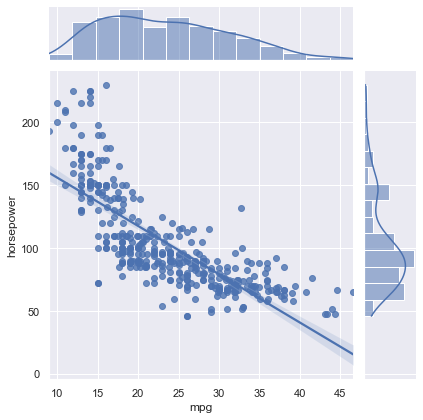

In [20]:
sns.jointplot(data=mpg, x="mpg", y="horsepower", kind="reg")

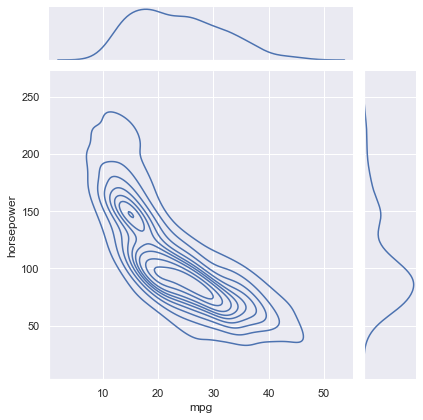

In [21]:
sns.jointplot(data=mpg, x="mpg", y="horsepower", kind="kde")

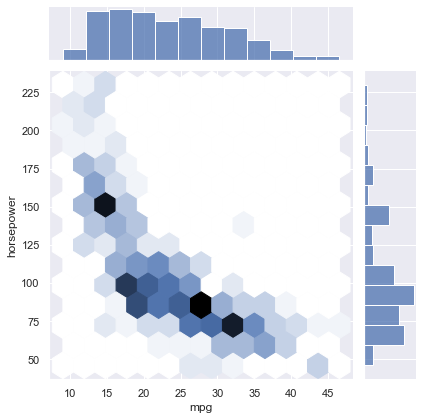

In [22]:
sns.jointplot(data=mpg, x="mpg", y="horsepower", kind="hex")

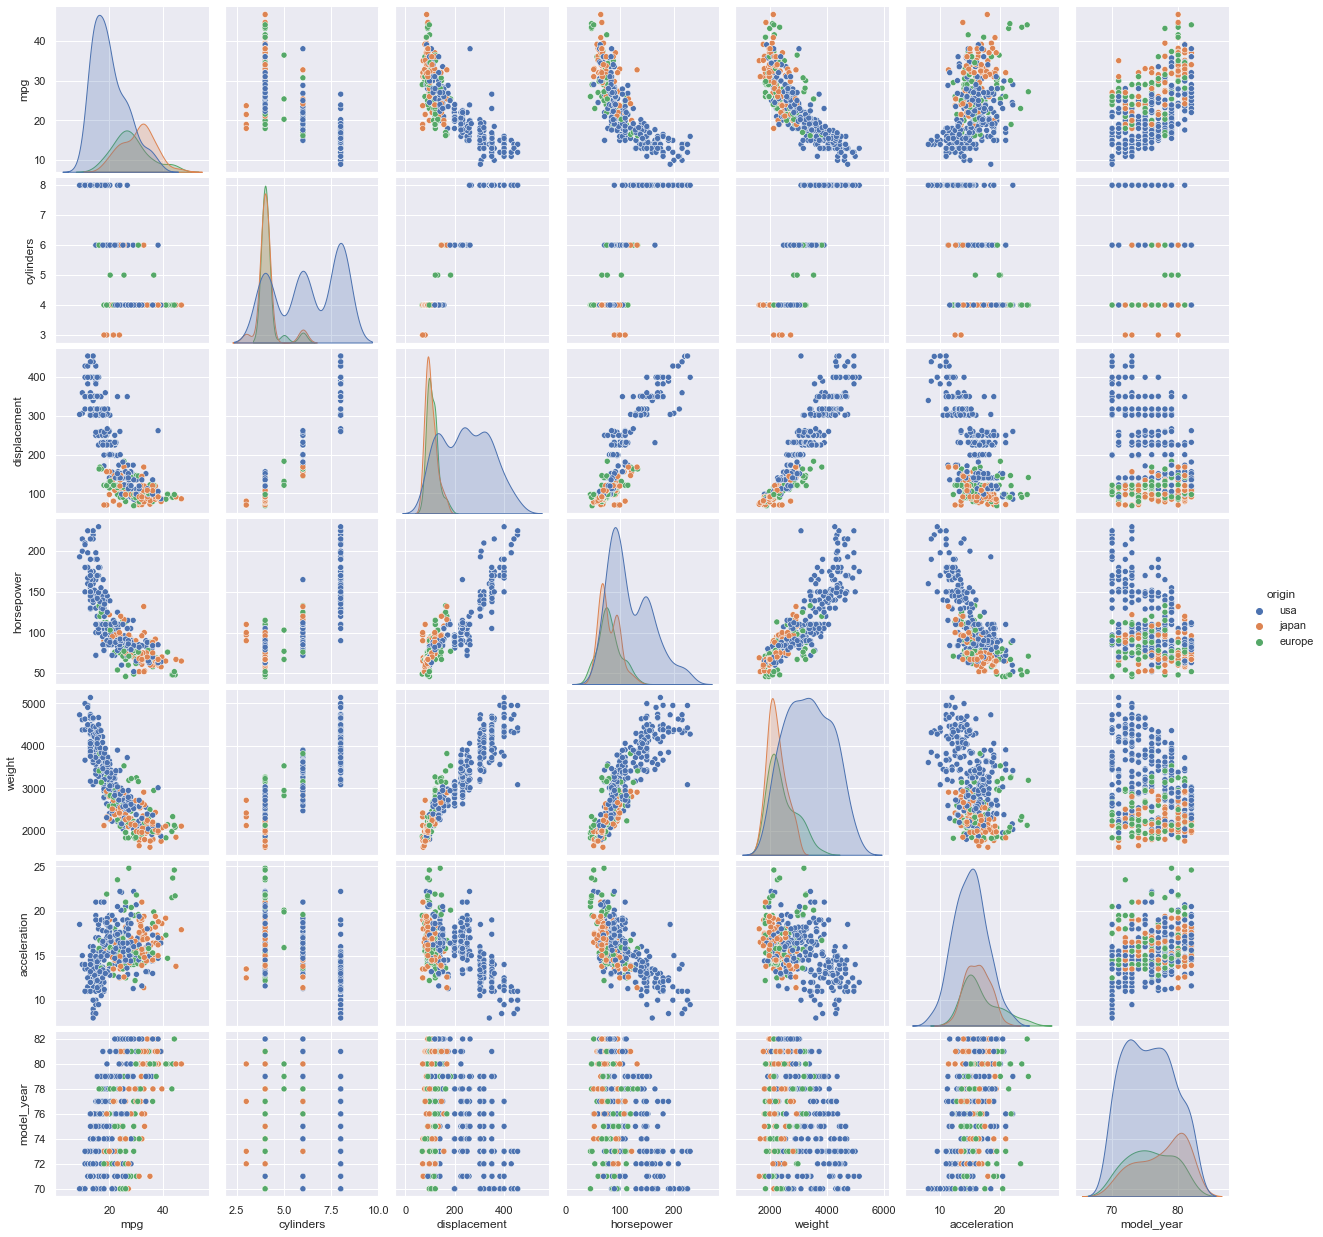

In [23]:
sns.pairplot(mpg, hue="origin")

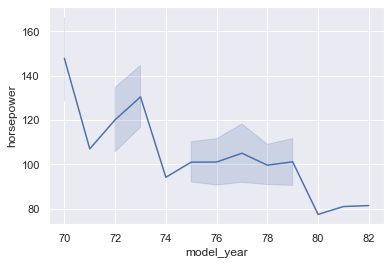

In [24]:
import numpy as np
sns.lineplot(data=mpg, x="model_year", y="horsepower", estimator=np.mean)

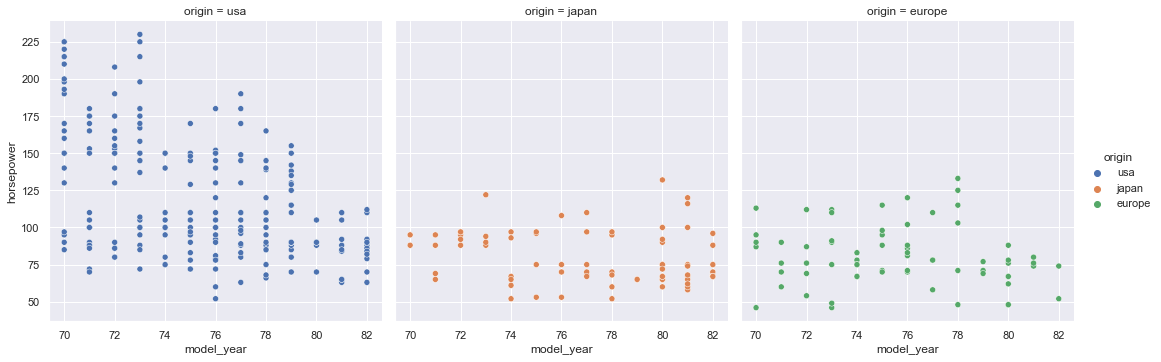

In [25]:
sns.relplot(data=mpg, x="model_year", y="horsepower", hue="origin", col="origin")

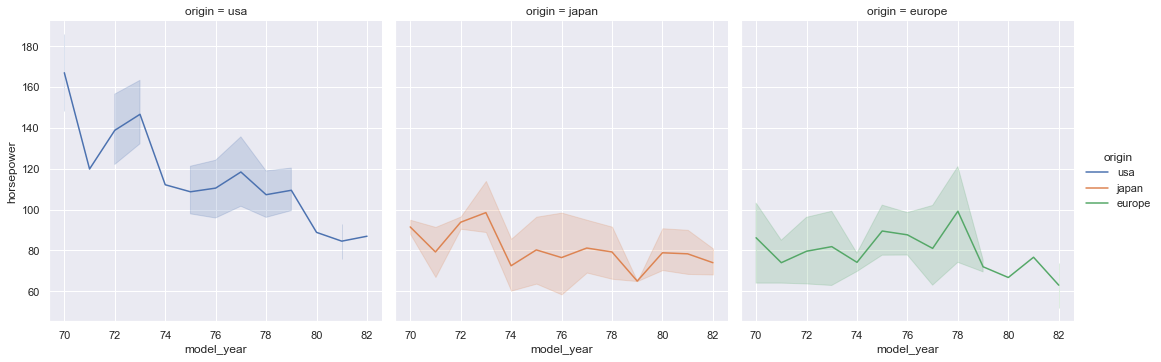

In [26]:
sns.relplot(data=mpg, x="model_year", y="horsepower", kind="line", hue="origin", col="origin")

In [27]:
corr = mpg.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


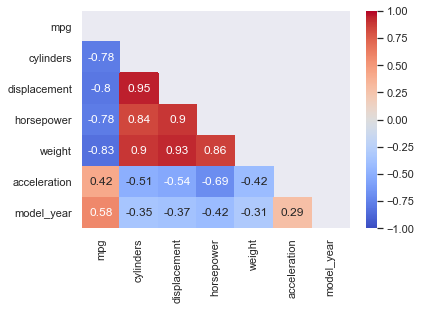

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask)